In [4]:
import pandas as pd

from __future__ import print_function
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

C:\Users\Pooneh\AppData\Roaming\Python\Python27\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data_final = pd.read_csv("final_data.csv")

In [6]:
data_office = data_final[data_final['Primary Property Type - Self Selected'] !='Residential']

In [7]:
data_office.shape

(667, 17)

In [5]:
data_final.shape

(6412, 17)

In [9]:
y_office = data_office['Weather Normalized Site EUI (kBtu/ft²)']

In [10]:
X_office = data_office[['BuiltFAR', 'YearBuilt',
       'DOF Property Floor Area (ft²)', 'LotType', 'ProxCode', 'NumFloors', 'LotArea','Oil','Diesel','Water', 'Gas', 'Electricity']]

In [11]:
X_train_office, X_test_office, y_train_office, y_test_office = train_test_split(X_office,
                           y_office, test_size = 0.3, random_state =999)

In [12]:
regressor = RandomForestRegressor()
gr = GridSearchCV(regressor, param_grid={'max_depth': range(1,100)})
rf_gr = gr.fit(X_train_office, y_train_office)
print (rf_gr.best_params_)

{'max_depth': 1}


In [13]:
rf_gr.score(X_test_office, y_test_office)

0.058183759956214831

In [14]:
forest = regressor.fit(X_train_office, y_train_office)
pred_y = regressor.predict(X_test_office)


In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
w = []
w = y_test_office

In [21]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [22]:
print("Feature ranking:")
for f in range(X_office.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_office.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature YearBuilt (0.218060)
2. feature BuiltFAR (0.184002)
3. feature LotArea (0.168292)
4. feature DOF Property Floor Area (ft²) (0.153563)
5. feature NumFloors (0.088837)
6. feature LotType (0.051958)
7. feature Electricity (0.045110)
8. feature Gas (0.038505)
9. feature ProxCode (0.036114)
10. feature Oil (0.013307)
11. feature Water (0.002252)
12. feature Diesel (0.000000)


In [23]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

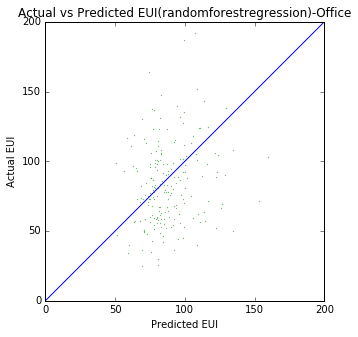

In [25]:
import matplotlib.pyplot as plt
#import plotl
plt.figure(figsize=(5,5))
plt.plot(range(0,200,1), range(0,200, 1))

plt.scatter(pred_y, w, s = 0.05, color='g', alpha=1)

plt.title('Actual vs Predicted EUI(randomforestregression)-Office')

# y label
plt.ylabel('Actual EUI')

# x label
plt.xlabel('Predicted EUI')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()